In [481]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [482]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [483]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [484]:
df.info()#null values of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [485]:
df.duplicated().sum()#duplicated values in data

0

In [486]:
#number of people leave the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [487]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [488]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [489]:
#delete the rows
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [490]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [491]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)#convert in numerical dataset

In [492]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [493]:
X = df.drop(columns=['Exited'])
y = df['Exited']
#specified range
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [494]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [495]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [496]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [497]:
X_train_scaled#Scaling done

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [498]:
#Tensor flow
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [499]:
#Sequential model
model = Sequential()
#3 perceptron
model.add(Dense(5,activation='relu',input_dim = 11))#dense layer create
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [500]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [501]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)#Train the neural network

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.7972 - val_loss: 0.5112 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7972 - val_loss: 0.4882 - val_accuracy: 0.7975
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7972 - val_loss: 0.4666 - val_accuracy: 0.7975
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7972 - val_loss: 0.4488 - val_accuracy: 0.7975
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7972 - val_loss: 0.4358 - val_accuracy: 0.7975
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7972 - val_loss: 0.4254 - val_accuracy: 0.7975
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.7972 - val_loss: 0.4172 - val_accuracy: 0.7975
Epoch 

In [502]:
model.layers[0].get_weights()#1st to 2nd node weights

[array([[-0.05515466, -0.10858308, -0.26174447, -0.08715824,  0.33107442],
        [ 0.7371809 ,  0.5392006 ,  0.3376427 ,  0.7278344 ,  0.7590625 ],
        [ 0.10509727, -0.03718788, -0.13201734,  0.06974821,  0.13760453],
        [-0.3609911 ,  0.45765674, -0.3346118 , -0.0997168 ,  0.3070464 ],
        [-1.0713842 ,  1.8093793 , -1.3049786 ,  0.03850168, -0.97412384],
        [-0.33453584, -0.02128293,  0.09086379,  0.6193297 ,  0.3084234 ],
        [-0.25848448, -0.08872239,  0.22338933,  1.0305047 , -0.68838066],
        [ 0.14549504,  0.02268833,  0.04830128,  0.00770391, -0.09208595],
        [-0.04375606, -0.17578226,  0.17460875, -0.49721187,  0.4226733 ],
        [-0.186103  ,  0.11903113, -0.01424287,  0.0974905 ,  0.24153899],
        [-0.0704978 , -0.14342465, -0.02689356,  0.5912001 , -0.09338053]],
       dtype=float32),
 array([-0.5896183 , -0.8784284 , -0.11816571,  0.2130517 , -0.2631289 ],
       dtype=float32)]

In [503]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [504]:
y_pred = np.where(y_log>0.5,1,0)

In [505]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

In [506]:
import matplotlib.pyplot as plt


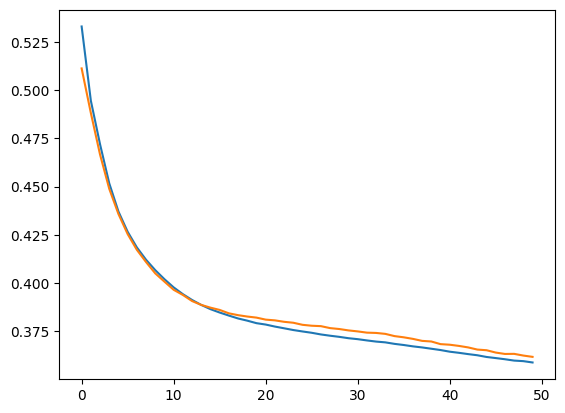

In [508]:
plt.plot(history.history['loss'])#sort of overfitting
plt.plot(history.history['val_loss'])

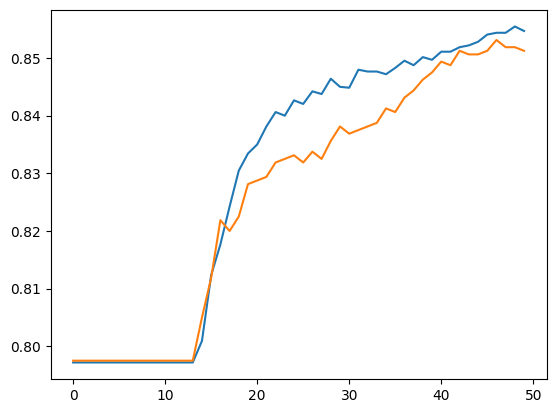

In [509]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])